# KNN Classifier for penguins

The following exercise aims to apply a KNN classifier to distinguish different species of penguins based on the Palmer Penguins dataset imported via Seaborn.

#### 1) Import libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline


#### 2) Load data

In [31]:
# Load penguins dataset
penguins = sns.load_dataset("penguins")

# Show first rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### 3) Inspect the data
Apply the fundamental tools of EDA (summary statistics, visualisation!) and see which features might be well suited for classification!

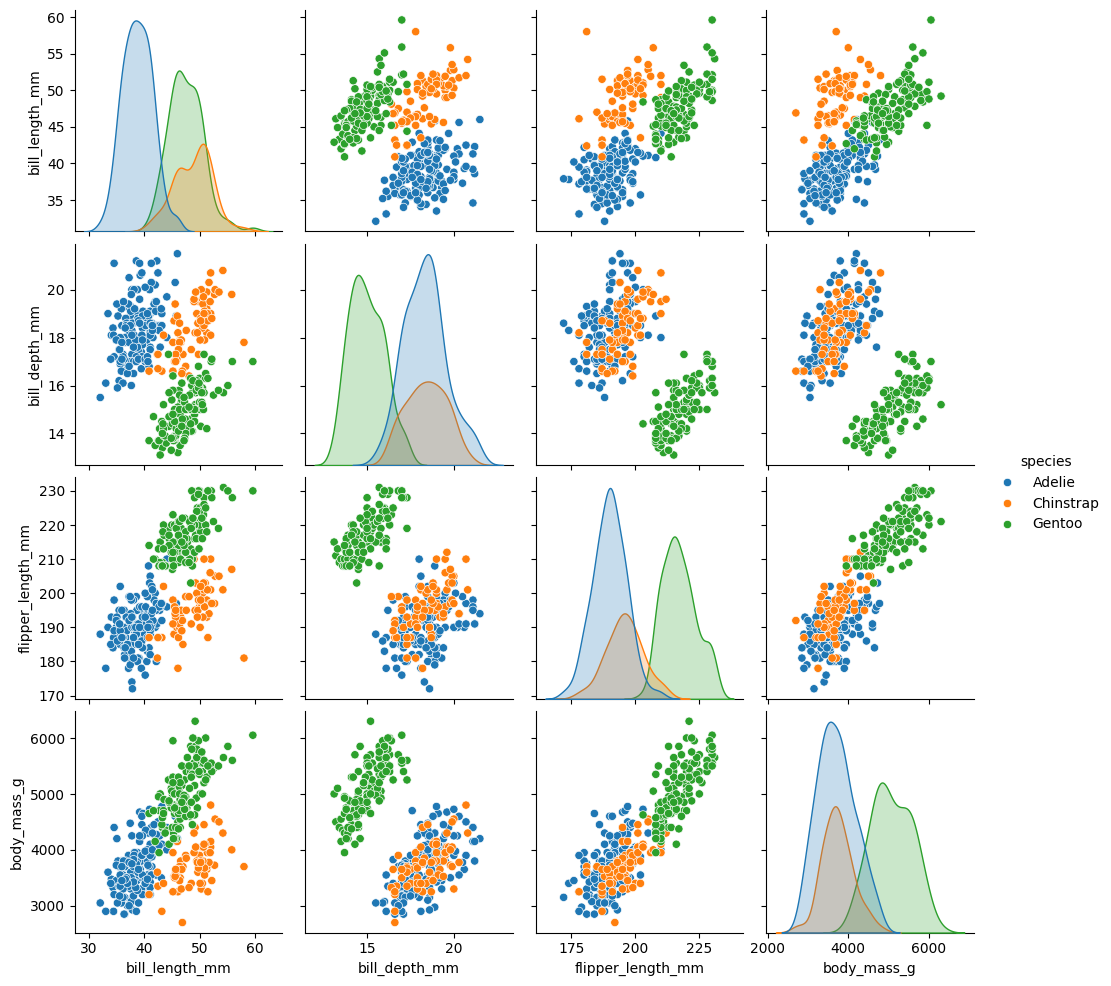

In [34]:
sns.pairplot(data=penguins, hue="species")

#### 4) Data cleaning
Drop rows with missing numerical values or missing labels (Hint: ideally with subset! Don't forget to comment!), then separate the features (X) and targets (y).

In [38]:
# NaNs are super bad for KNN ...drop them :)
penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [39]:
# Features (X) and target (y)
X = penguins[[
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g"
]]

y = penguins["species"]

#### 5) Train-test split
Check later, how a different split ratio influences the prediction!

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

#### 6) Feature scaling
kNN = distance based algorithm, scaling is essential!

In [41]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 7) Train the model
For a start, use k=5, then try higher and lower values and see how the prediction changes.

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


#### 8) Predictions
Predict the label for both the training and the test set!

In [43]:
y_test_pred = knn.predict(X_test_scaled)
y_train_pred = knn.predict(X_train_scaled)

#### 9) Evaluation of the model

In [44]:
print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Accuracy on test set:", accuracy_score(y_test, y_test_pred))
print("\n------------------------------------------------")
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

Accuracy on training set: 0.9957081545064378
Accuracy on test set: 1.0

------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        44
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



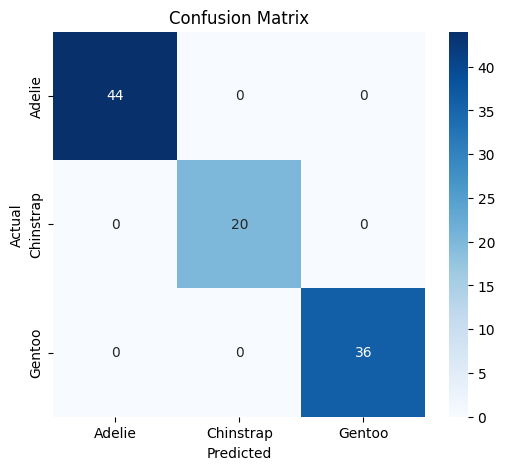

In [45]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=knn.classes_,
            yticklabels=knn.classes_,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### 10) Explore
- Try different k
- See what happens if you omit the scaling

#### 11) Predict labels for unknown data

- Predict the labels for the (generated) penguins in "penguins_mystery.csv".
- Invent your own penguin and see which class it would be according to the KNN. You can exaggerate a bit ;-) 
- Bonus: Use an AI tool to create an image for your fantasy penguin and share it on the teams channel.

In [50]:
penguins_to_predict = pd.read_csv("penguins_mystery.csv")
# make sure there is no NaN:
print(penguins_to_predict.info())
penguins_to_predict.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20 non-null     int64  
 1   island             20 non-null     object 
 2   bill_length_mm     20 non-null     float64
 3   bill_depth_mm      20 non-null     float64
 4   flipper_length_mm  20 non-null     int64  
 5   body_mass_g        20 non-null     int64  
 6   sex                20 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.2+ KB
None


,id,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Biscoe,50.4,14.4,211,4857,male
1,2,Biscoe,38.7,20.3,201,2783,female
2,3,Dream,45.5,17.1,199,3553,male
3,4,Dream,38.5,18.6,192,3735,male
4,5,Biscoe,36.1,18.5,183,3806,male


In [ ]:
# Extract and scale numerical features
X_to_predict = penguins_to_predict[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
X_to_predict_scaled = scaler.transform(X_to_predict)

In [52]:
penguins_to_predict["predicted_species"] = knn.predict(X_to_predict_scaled)
penguins_to_predict

,id,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,predicted_species
0,1,Biscoe,50.4,14.4,211,4857,male,Gentoo
1,2,Biscoe,38.7,20.3,201,2783,female,Adelie
2,3,Dream,45.5,17.1,199,3553,male,Chinstrap
3,4,Dream,38.5,18.6,192,3735,male,Adelie
4,5,Biscoe,36.1,18.5,183,3806,male,Adelie
5,6,Biscoe,48.4,16.5,223,5551,male,Gentoo
6,7,Dream,51.6,19.9,185,4030,female,Chinstrap
7,8,Dream,48.6,21.1,194,3994,male,Chinstrap
8,9,Biscoe,47.6,13.6,213,5113,male,Gentoo
9,10,Dream,39.1,19.3,182,3588,male,Adelie


In [62]:
# Invent new penguins: 
new_penguins = pd.DataFrame(
    {
    "bill_length_mm": [197.2, 45.3, 56.6],
    "bill_depth_mm": [15.2, 22.4, 19.1],
    "flipper_length_mm": [220, 238, 289],
    "body_mass_g": [12014, 2907, 6781]
    }
)
new_penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,197.2,15.2,220,12014
1,45.3,22.4,238,2907
2,56.6,19.1,289,6781


In [63]:
# scale unknown penguins
X_new_scaled = scaler.transform(new_penguins)
new_penguins["predicted_label"] = knn.predict(X_new_scaled)
new_penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,predicted_label
0,197.2,15.2,220,12014,Gentoo
1,45.3,22.4,238,2907,Chinstrap
2,56.6,19.1,289,6781,Gentoo


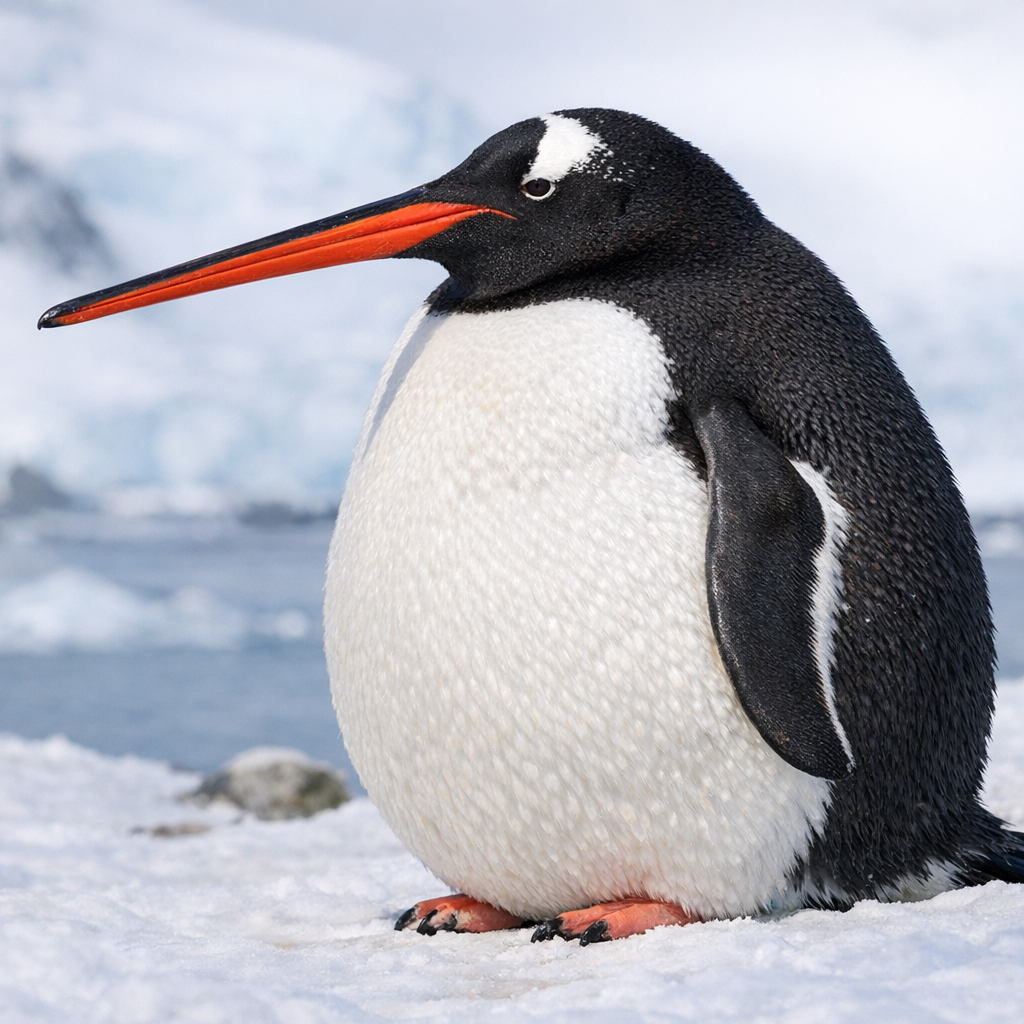